In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the dataset 
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking for duplicate values in the dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [4]:
#checking for the missing values in the dataset
df.notnull()

#Fill missing values for 'Age' with the median age
df['Age'] = df['Age'].fillna('No Age')

# Fill missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#drop unnecessary columns 
df.drop(columns=['PassengerId','Name'], axis=1, inplace=True)

In [5]:
#checking the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.7+ KB


In [6]:
#Exploratory Data Analysis (EDA) and exploring the relationships between variables and identify patterns and trends in the data

# Checking the overall survival rate
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(f"Survival Rate:\n{survival_rate}")

Survival Rate:
0    61.616162
1    38.383838
Name: Survived, dtype: float64


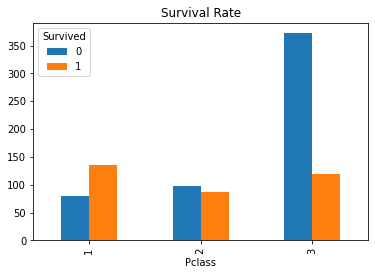

In [7]:
# Plot the distribution of 'Pclass' and 'Survived'
counts = df.groupby(['Pclass', 'Survived']).size().unstack()
counts.plot(kind="bar")
plt.title('Survival Rate')
plt.show()

Survival Rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


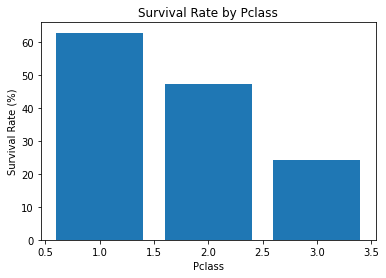

In [8]:
# Exploring the relationship between 'Pclass' and 'Survived'
pclass_survived = df.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")

# Visualizing the relationship between 'Pclass' and 'Survived'
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

In [9]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = df.groupby('Sex')['Survived'].mean() * 100
print(f"Survival Rate by Sex:\n{sex_survived}")

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


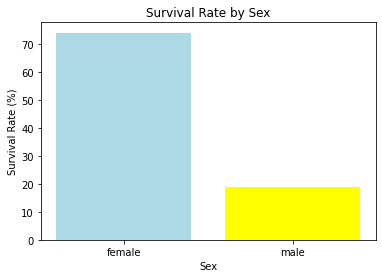

In [10]:
# Visualizing the relationship between 'Sex' and 'Survived'
plt.bar(sex_survived.index, sex_survived.values, color = ('lightblue', 'yellow'))
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

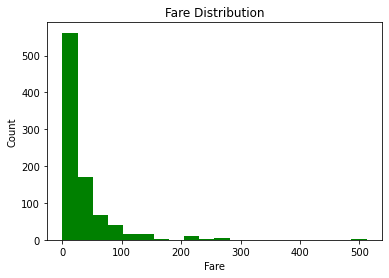

In [11]:
# Explorinng the fare distribution of passengers
plt.hist(df['Fare'], bins=20, color = ('green'))
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()